**Sources**:

https://www.kaggle.com/kamalkhumar/loan-status-prediction

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_data_set.csv


# **DS Toolkit for Classification**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
%matplotlib inline

In [3]:
FILEPATH = '/kaggle/input/loan-data-set/loan_data_set.csv'

In [4]:
df = pd.read_csv(FILEPATH)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **DataFrame Analysis**

* Size
* Description
* Info
* Null values in any columns

In [5]:
df.shape

(614, 13)

In [6]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001116,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Null values are there but,

How many values are null exactly??

In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It is hard to replace values like Gender, Married since they're categorical.

Other columns are not numerical so we can mostly drop them for the lack of a better strategy.

For the columns that are numerical, let's fill 'em shall we??

In [10]:
df.Credit_History.fillna(df.Credit_History.mean(), inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

In [11]:
df.dropna(how="any",inplace=True)

In [12]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

Ok null values are handled 

Loan ID is good but not that important so we drop it

In [13]:
df.drop("Loan_ID", axis=1, inplace=True)

We need numeric values for a classifier so we need to encode it. Label Encoder is used in this notebook

In [14]:
le = LabelEncoder()
cols = df.columns.tolist()
for column in cols:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [15]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

Alright on to,

# The Heatmap of Correlation

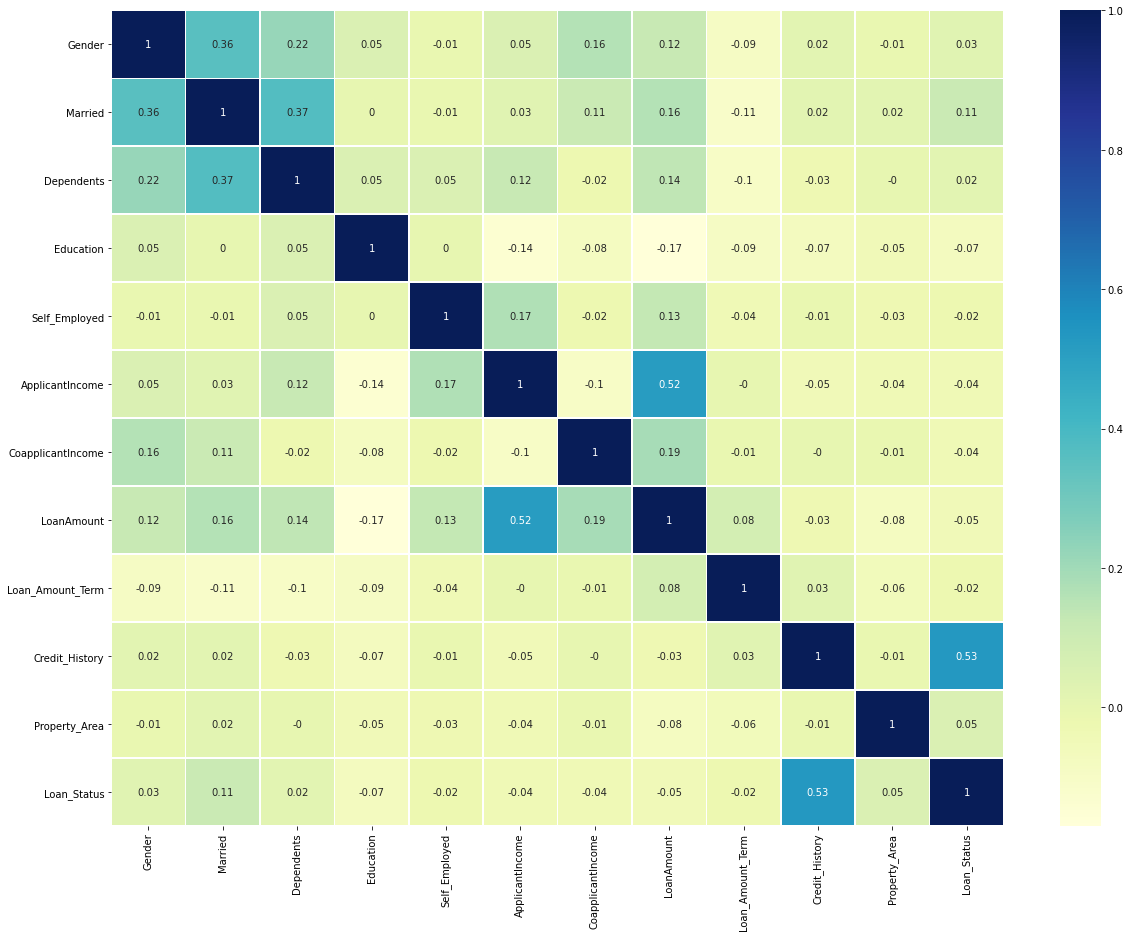

In [16]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

This is a function to plot feature importance for a model

In [17]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

**Random Forest Classifier**

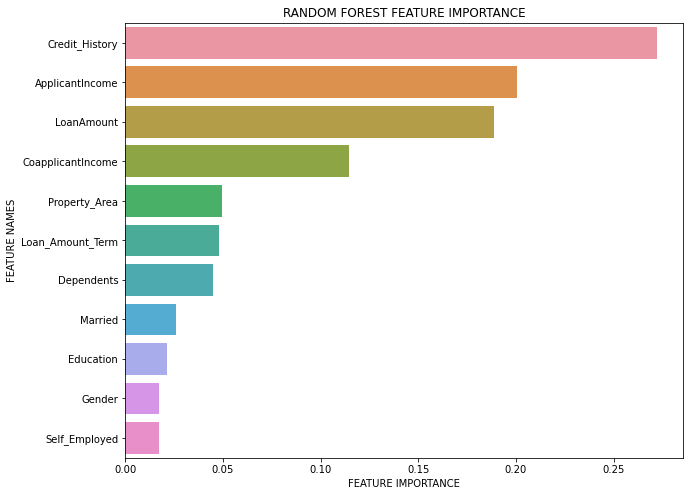

In [18]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

rand_f = RandomForestClassifier().fit(X, y)

plot_feature_importance(rand_f.feature_importances_, X.columns, 'RANDOM FOREST')

# Top 5

* Credit_History
* Applicant_Income
* Loan_Amount
* Copplicant_Income
* Loan_Amount_Term

Which makes sense since these are the parameters on which a bank decides whether to give a loan or not

# **Gradient Boosting Classifier**

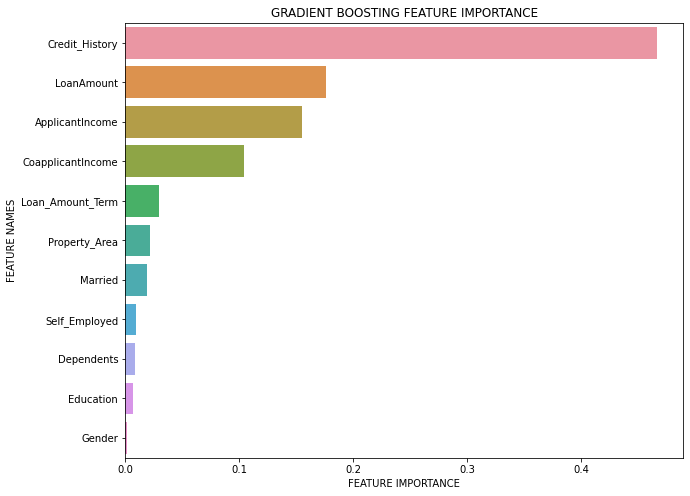

In [19]:
gb_m = GradientBoostingClassifier().fit(X, y)

plot_feature_importance(gb_m.feature_importances_, X.columns, 'GRADIENT BOOSTING')

Same Top 5 as Random Forest

# **Ada Boosting Classifier**

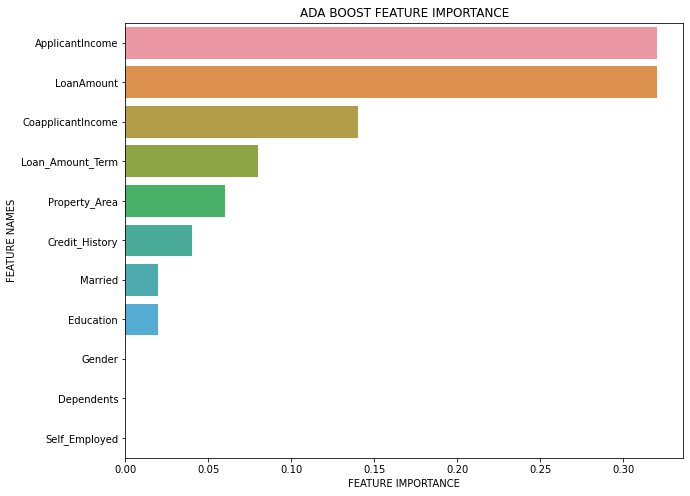

In [20]:
ada = AdaBoostClassifier().fit(X, y)

plot_feature_importance(ada.feature_importances_, X.columns, 'ADA BOOST')

Property Area sneaks ahead of Credit History in Ada Boosting which is interesting

In [21]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = SVC()

grid = GridSearchCV(svc, parameters)

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=30) 

In [23]:
grid.fit(Xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [24]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [25]:
pred = grid.best_estimator_.predict(Xtest)

In [26]:
confusion_matrix(ytest,pred)

array([[ 15,  34],
       [  2, 110]])

In [27]:
print("Accuracy score: {0}%".format((accuracy_score(ytest,pred)*100).round(2)))

Accuracy score: 77.64%


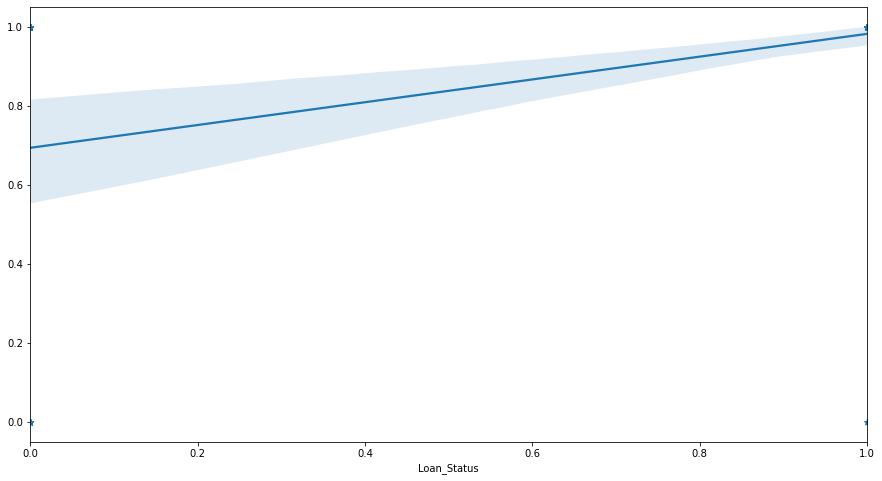

In [28]:
fig,ax=plt.subplots(figsize=(15,8))
sns.regplot(x=ytest,y=pred,marker="*")
plt.show()